# SMS Test
## Introduction
This is a test assessment from __SMS__. There are 2 datasets including __Cadidate/EPL.xlsx__ (England football matches) and __Cadidate/ITA.xlsx__ (Italy football matches). \
The information fields of 2 datasets are the same: \
    + __Matchweek__. (Numerical value) \
    + __Day__. (Text value) \
    + __Date__. (Time value) \
    + __Season__. (Time value) \
    + __Time__.  (Time value) \
    + __home_team__. (Text value) \
    + __home_score__. (Numerical value) \
    + __away_team__. (Text value) \
    + __away_score__. (Numerical value) \
    + __Venue__. (Text value) \
    + __Referee__. (Text value) \
    + __diff_score__. (Numerical value) \
I will explore these datasets and build a machine learning model based on one of these datasets with labels __["Draw", "Lose", "Win"]__

## Importing library & Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Problem 1: Analysis

In [2]:
EplData = pd.read_excel("Candidate Data/EPL.xlsx")

In [3]:
ItaData = pd.read_excel("Candidate Data/ITA.xlsx")

In [4]:
EplData.head()

,Matchweek,Day,Date,Season,Time,home_team,home_score,away_team,away_score,Venue,Referee,diff_score
0,1,Fri,2022-08-05,2022-2023,20:00,Crystal Palace,0,Arsenal,2,Selhurst Park,Anthony Taylor,-2
1,1,Sat,2022-08-06,2022-2023,12:30,Fulham,2,Liverpool,2,Craven Cottage,Andy Madley,0
2,1,Sat,2022-08-06,2022-2023,15:00,Tottenham,4,Southampton,1,Tottenham Hotspur Stadium,Andre Marriner,3
3,1,Sat,2022-08-06,2022-2023,15:00,Newcastle United,2,Nottingham Forest,0,St James' Park,Simon Hooper,2
4,1,Sat,2022-08-06,2022-2023,15:00,Leeds United,2,Wolves,1,Elland Road,Robert Jones,1


In [5]:
ItaData.head()

,Matchweek,Day,Date,Season,Time,home_team,home_score,away_team,away_score,Venue,Referee,diff_score
0,1.0,Sat,2022-08-13,2022-2023,18:30,Sampdoria,0,Atalanta,2,Stadio Comunale Luigi Ferraris,Federico Dionisi,-2
1,1.0,Sat,2022-08-13,2022-2023,18:30,Milan,4,Udinese,2,Stadio Giuseppe Meazza,Livio Marinelli,2
2,1.0,Sat,2022-08-13,2022-2023,20:45,Monza,1,Torino,2,U-Power Stadium,Maurizio Mariani,-1
3,1.0,Sat,2022-08-13,2022-2023,20:45,Lecce,1,Inter,2,Stadio Comunale Via Del Mare,Alessandro Prontera,-1
4,1.0,Sun,2022-08-14,2022-2023,18:30,Fiorentina,3,Cremonese,2,Stadio Artemio Franchi,Juan Sacchi,1


Through view of 2 datasets, I can realize that the __these datasets__ based on
+ __home_team__
+ __home_score__
+ __away_team__
+ __away_score__

Because __diff_score__ = __home_score__ - __away_score__, so it will mean that
+ If __diff_score__ > 0 --> __Win__
+ If __diff_score__ = 0 --> __Draw__
+ If __diff_score__ < 0 --> __Lose__

### Analyzing each dataset

In [6]:
EplData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Matchweek   663 non-null    int64         
 1   Day         663 non-null    object        
 2   Date        663 non-null    datetime64[ns]
 3   Season      663 non-null    object        
 4   Time        663 non-null    object        
 5   home_team   663 non-null    object        
 6   home_score  663 non-null    int64         
 7   away_team   663 non-null    object        
 8   away_score  663 non-null    int64         
 9   Venue       663 non-null    object        
 10  Referee     663 non-null    object        
 11  diff_score  663 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 62.3+ KB


There is __no null value__ in each column with __663 matches__ in England football data.

In [7]:
ItaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Matchweek   669 non-null    float64       
 1   Day         670 non-null    object        
 2   Date        670 non-null    datetime64[ns]
 3   Season      670 non-null    object        
 4   Time        670 non-null    object        
 5   home_team   670 non-null    object        
 6   home_score  670 non-null    int64         
 7   away_team   670 non-null    object        
 8   away_score  670 non-null    int64         
 9   Venue       670 non-null    object        
 10  Referee     670 non-null    object        
 11  diff_score  670 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 62.9+ KB


With the dataset, __Matchweek__ has one null value and other fields haven't null values (__670 matches__).

### Ploting histogram for these datasets.
First, I will convert __diff_score__ into __target__ field:
+ __Win__
+ __Lose__
+ __Draw__

In [8]:
def Convert_score_to_label(data):
    label = []
    for i in data:
        if i > 0:
            label.append("Win")
        elif i < 0:
            label.append("Lose")
        else:
            label.append("Draw")
    return label

In [9]:
LabelEpl = Convert_score_to_label(EplData["diff_score"])

In [10]:
EplData.insert(len(EplData.columns),"target", LabelEpl)

In [11]:
EplData.head()

,Matchweek,Day,Date,Season,Time,home_team,home_score,away_team,away_score,Venue,Referee,diff_score,target
0,1,Fri,2022-08-05,2022-2023,20:00,Crystal Palace,0,Arsenal,2,Selhurst Park,Anthony Taylor,-2,Lose
1,1,Sat,2022-08-06,2022-2023,12:30,Fulham,2,Liverpool,2,Craven Cottage,Andy Madley,0,Draw
2,1,Sat,2022-08-06,2022-2023,15:00,Tottenham,4,Southampton,1,Tottenham Hotspur Stadium,Andre Marriner,3,Win
3,1,Sat,2022-08-06,2022-2023,15:00,Newcastle United,2,Nottingham Forest,0,St James' Park,Simon Hooper,2,Win
4,1,Sat,2022-08-06,2022-2023,15:00,Leeds United,2,Wolves,1,Elland Road,Robert Jones,1,Win


(array([203.,   0.,   0.,   0.,   0., 146.,   0.,   0.,   0., 314.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

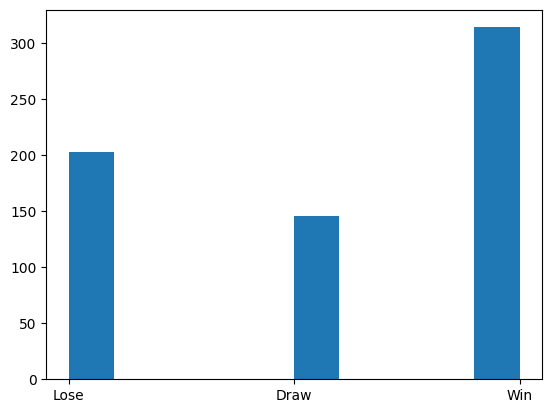

In [12]:
plt.hist(EplData["target"])

In [13]:
EplData.target.value_counts()

target
Win     314
Lose    203
Draw    146
Name: count, dtype: int64

In [14]:
LabelIta = Convert_score_to_label(ItaData["diff_score"])

In [15]:
ItaData.insert(len(ItaData.columns),"target", LabelIta)

In [16]:
ItaData.head()

,Matchweek,Day,Date,Season,Time,home_team,home_score,away_team,away_score,Venue,Referee,diff_score,target
0,1.0,Sat,2022-08-13,2022-2023,18:30,Sampdoria,0,Atalanta,2,Stadio Comunale Luigi Ferraris,Federico Dionisi,-2,Lose
1,1.0,Sat,2022-08-13,2022-2023,18:30,Milan,4,Udinese,2,Stadio Giuseppe Meazza,Livio Marinelli,2,Win
2,1.0,Sat,2022-08-13,2022-2023,20:45,Monza,1,Torino,2,U-Power Stadium,Maurizio Mariani,-1,Lose
3,1.0,Sat,2022-08-13,2022-2023,20:45,Lecce,1,Inter,2,Stadio Comunale Via Del Mare,Alessandro Prontera,-1,Lose
4,1.0,Sun,2022-08-14,2022-2023,18:30,Fiorentina,3,Cremonese,2,Stadio Artemio Franchi,Juan Sacchi,1,Win


(array([205.,   0.,   0.,   0.,   0., 288.,   0.,   0.,   0., 177.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

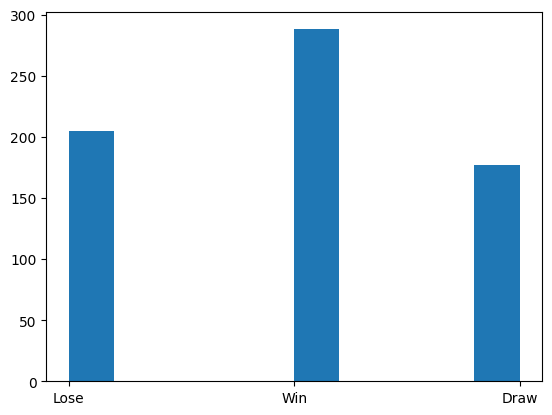

In [17]:
plt.hist(ItaData["target"])

In [18]:
ItaData.target.value_counts()

target
Win     288
Lose    205
Draw    177
Name: count, dtype: int64

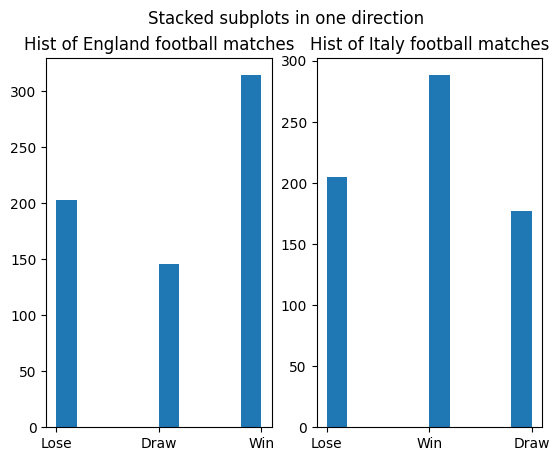

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(EplData.target)
ax[1].hist(ItaData.target)
 
# plot 2 subplots
ax[0].set_title('Hist of England football matches')
ax[1].set_title('Hist of Italy football matches')
 
fig.suptitle('Stacked subplots in one direction')
plt.show()

__Analysis__: I can realize that the England football matches are more iteresting than Italy football matches, because:
+ __Win__ (England football matches) > __Win__ (Italy football matches)
+ __Lose__ (Epl Data) < __Lose__ (ItaData)
+ __Draw__ (Epl Data) < __Draw__ (ItaData) \
Eventhough, the number of matches in Italy matches is larger than England matches.

### Deep dive into each dataset.
Firstly, I will analyze deeply England football matches.

In [20]:
EplData.home_team.unique()

array(['Crystal Palace', 'Fulham', 'Tottenham', 'Newcastle United',
       'Leeds United', 'Bournemouth', 'Everton', 'Leicester City',
       'Manchester United', 'West Ham United', 'Aston Villa',
       'Manchester City', 'Southampton', 'Wolves', 'Arsenal', 'Brighton',
       'Brentford', 'Nottingham Forest', 'Chelsea', 'Liverpool',
       'Burnley', 'Sheffield United', 'Luton Town'], dtype=object)

In [21]:
num_home_team_Epl = len(EplData.home_team.unique())
num_home_team_Epl

23

__Analysis__: There are 23 football team in the dataset. \
## __Another analysis__:

I will check how many __Win/ Lose/ Draw/__ in each team (__home_team__) in the dataset

In [22]:
win_home_team_Epl = EplData[EplData["target"]=="Win"].home_team.value_counts()
win_home_team_Epl

home_team
Manchester City      27
Arsenal              25
Liverpool            24
Manchester United    23
Tottenham            22
Aston Villa          22
Newcastle United     20
Fulham               17
Brighton             17
Wolves               16
West Ham United      14
Brentford            14
Nottingham Forest    12
Chelsea              12
Crystal Palace       11
Bournemouth          10
Everton               9
Leicester City        5
Leeds United          5
Luton Town            3
Southampton           2
Sheffield United      2
Burnley               2
Name: count, dtype: int64

In [23]:
draw_home_team_Epl = EplData[EplData["target"]=="Draw"].home_team.value_counts()
draw_home_team_Epl

home_team
Brentford            11
Crystal Palace       11
West Ham United      10
Brighton             10
Chelsea              10
Bournemouth           9
Nottingham Forest     9
Liverpool             8
Newcastle United      8
Leeds United          7
Everton               7
Fulham                6
Wolves                6
Southampton           5
Manchester City       5
Arsenal               5
Leicester City        4
Manchester United     4
Aston Villa           3
Luton Town            3
Sheffield United      2
Burnley               2
Tottenham             1
Name: count, dtype: int64

In [24]:
lose_home_team_Epl = EplData[EplData["target"]=="Lose"].home_team.value_counts()
lose_home_team_Epl

home_team
Everton              17
Bournemouth          14
Nottingham Forest    12
Southampton          12
Crystal Palace       11
Burnley              11
Wolves               11
Fulham               11
Leicester City       10
West Ham United      10
Tottenham            10
Chelsea              10
Sheffield United     10
Luton Town            9
Aston Villa           8
Brentford             8
Leeds United          7
Brighton              6
Manchester United     6
Newcastle United      5
Arsenal               3
Liverpool             1
Manchester City       1
Name: count, dtype: int64

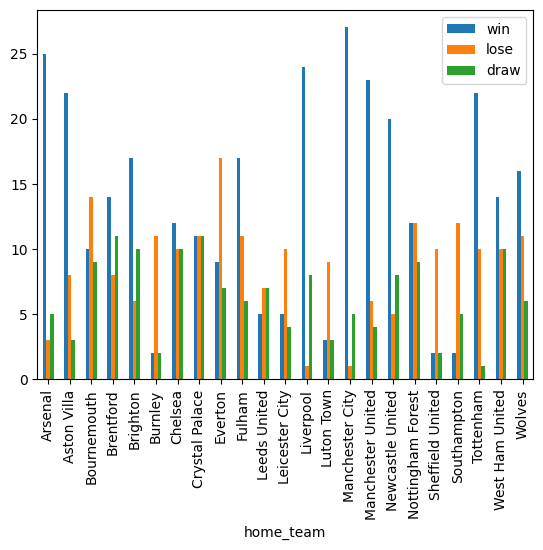

In [25]:
df_Epl = pd.DataFrame({'win': win_home_team_Epl, 'lose': lose_home_team_Epl, 'draw': draw_home_team_Epl})
ax = df_Epl.plot.bar()

In [26]:
win_home_team_Ita = ItaData[ItaData["target"]=="Win"].home_team.value_counts()
win_home_team_Ita

home_team
Inter            26
Milan            23
Juventus         22
Roma             21
Napoli           20
Atalanta         20
Bologna          18
Fiorentina       17
Lazio            17
Monza            13
Sassuolo         12
Torino           11
Hellas Verona    10
Empoli           10
Salernitana       8
Lecce             8
Udinese           7
Frosinone         6
Genoa             5
Cagliari          5
Spezia            4
Cremonese         4
Sampdoria         1
Name: count, dtype: int64

In [27]:
draw_home_team_Ita = ItaData[ItaData["target"]=="Draw"].home_team.value_counts()
draw_home_team_Ita

home_team
Udinese          18
Torino           13
Lecce            12
Bologna          11
Salernitana      10
Monza            10
Fiorentina        9
Empoli            8
Hellas Verona     8
Juventus          8
Spezia            8
Lazio             7
Napoli            7
Sassuolo          7
Sampdoria         7
Roma              6
Milan             6
Genoa             5
Cremonese         4
Atalanta          4
Cagliari          4
Frosinone         3
Inter             2
Name: count, dtype: int64

In [28]:
lose_home_team_Ita = ItaData[ItaData["target"]=="Lose"].home_team.value_counts()
lose_home_team_Ita

home_team
Salernitana      16
Empoli           16
Hellas Verona    15
Sassuolo         14
Lecce            13
Sampdoria        11
Cremonese        11
Monza            11
Lazio             9
Torino            9
Atalanta          9
Udinese           9
Spezia            8
Fiorentina        7
Roma              7
Inter             6
Napoli            6
Frosinone         6
Bologna           5
Cagliari          5
Milan             4
Juventus          4
Genoa             4
Name: count, dtype: int64

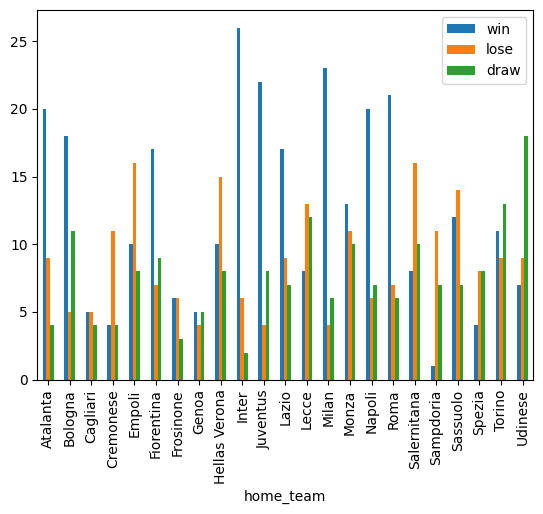

In [29]:
df_Ita = pd.DataFrame({'win': win_home_team_Ita, 'lose': lose_home_team_Ita, 'draw': draw_home_team_Ita})
ax = df_Ita.plot.bar()

### Analysis of the number of matches in each season

In each season, each team has __38 matches__ including home and away matches for England and Italy footbatch matches. As I said that the dataset is based on __home_team__, it means that we can check each team will have __19 matches__.
+ Check how many season in the dataset.
+ Check how many match of each team in one season

In [30]:
EplData.Season.value_counts()

Season
2022-2023    380
2023-2024    283
Name: count, dtype: int64

In [31]:
EplData[EplData["Season"]=="2022-2023"].home_team.value_counts()

home_team
Crystal Palace       19
Fulham               19
Chelsea              19
Nottingham Forest    19
Brentford            19
Brighton             19
Arsenal              19
Wolves               19
Southampton          19
Manchester City      19
Aston Villa          19
West Ham United      19
Manchester United    19
Leicester City       19
Everton              19
Bournemouth          19
Leeds United         19
Newcastle United     19
Tottenham            19
Liverpool            19
Name: count, dtype: int64

In [32]:
EplData[EplData["Season"]=="2023-2024"].home_team.value_counts()

home_team
Burnley              15
Fulham               15
West Ham United      15
Luton Town           15
Brighton             14
Bournemouth          14
Newcastle United     14
Brentford            14
Manchester United    14
Arsenal              14
Sheffield United     14
Liverpool            14
Wolves               14
Tottenham            14
Manchester City      14
Aston Villa          14
Everton              14
Crystal Palace       14
Nottingham Forest    14
Chelsea              13
Name: count, dtype: int64

Through the analysis:
+ __2022- 2023__ has a full of matches data
+ __2023- 2024__ has not a full of matches data \
Therefore, it means that the England Football Matches dataset is not full information for 2 seasons. \
Next, check the ItaData for Italy football matches.

In [33]:
ItaData.Season.value_counts()

Season
2022-2023    381
2023-2024    289
Name: count, dtype: int64

In [34]:
ItaData[ItaData["Season"]=="2022-2023"].home_team.value_counts()

home_team
Spezia           20
Sampdoria        19
Udinese          19
Roma             19
Atalanta         19
Bologna          19
Napoli           19
Empoli           19
Sassuolo         19
Inter            19
Torino           19
Milan            19
Juventus         19
Hellas Verona    19
Salernitana      19
Lazio            19
Fiorentina       19
Lecce            19
Monza            19
Cremonese        19
Name: count, dtype: int64

In [35]:
ItaData[ItaData["home_team"]=="Spezia"]

,Matchweek,Day,Date,Season,Time,home_team,home_score,away_team,away_score,Venue,Referee,diff_score,target
6,1.0,Sun,2022-08-14,2022-2023,20:45,Spezia,1,Empoli,0,Stadio Alberto Picco,Daniele Chiffi,1,Win
25,3.0,Sat,2022-08-27,2022-2023,20:45,Spezia,2,Sassuolo,2,Stadio Alberto Picco,Francesco Cosso,0,Draw
44,5.0,Sun,2022-09-04,2022-2023,15:00,Spezia,2,Bologna,2,Stadio Alberto Picco,Antonio Giua,0,Draw
62,7.0,Sat,2022-09-17,2022-2023,18:00,Spezia,2,Sampdoria,1,Stadio Alberto Picco,Simone Sozza,1,Win
95,10.0,Sun,2022-10-16,2022-2023,15:00,Spezia,2,Cremonese,2,Stadio Alberto Picco,Gianluca Manganiello,0,Draw
114,12.0,Sun,2022-10-30,2022-2023,15:00,Spezia,1,Fiorentina,2,Stadio Alberto Picco,Davide Massa,-1,Lose
131,14.0,Tue,2022-11-08,2022-2023,18:30,Spezia,1,Udinese,1,Stadio Alberto Picco,Marco Piccinini,0,Draw
152,16.0,Wed,2023-01-04,2022-2023,14:30,Spezia,2,Atalanta,2,Stadio Alberto Picco,Antonio Giua,0,Draw
164,17.0,Sun,2023-01-08,2022-2023,15:00,Spezia,0,Lecce,0,Stadio Alberto Picco,Daniele Chiffi,0,Draw
185,19.0,Sun,2023-01-22,2022-2023,18:00,Spezia,0,Roma,2,Stadio Alberto Picco,Simone Sozza,-2,Lose


Check the above information, I realize that the __380 index__ with __Matchweek__ has null value. There are 2 methods for handling the issue.
+ The row can be removed, because there is only 19 matches (not 20 matches). The method is sensible meaning in reality.
+ The row can be changed with __Matchweek__ column by replacing the numerical value.

In [36]:
ItaData[ItaData["Season"]=="2023-2024"].home_team.value_counts()

home_team
Frosinone        15
Udinese          15
Salernitana      15
Juventus         15
Empoli           15
Bologna          15
Monza            15
Roma             15
Inter            15
Lecce            14
Torino           14
Sassuolo         14
Hellas Verona    14
Milan            14
Genoa            14
Fiorentina       14
Napoli           14
Lazio            14
Cagliari         14
Atalanta         14
Name: count, dtype: int64

__In conclusion__: The analysis from 2 seasons of each dataset (England football matches and Italy football matches) are different. And the __Ita.xlsx__ is not clean data.

### Another Analysis

In [37]:
EplData.Day.value_counts()

Day
Sat    340
Sun    166
Wed     45
Mon     39
Tue     35
Fri     19
Thu     19
Name: count, dtype: int64

In [38]:
ItaData.Day.value_counts()

Day
Sun    276
Sat    206
Mon     71
Fri     58
Wed     37
Tue     12
Thu     10
Name: count, dtype: int64

Through the analysis of __"Day"__ field, I realize that English and Italy football matches are the same match day __Sun/ Sat/ Fri/ Thu/ Wed/ Tue/ Mon__ \
I will analyze the rate of "Win"/ "Draw"/ "Lose" day

In [39]:
daywin_epltdata=EplData[EplData["target"]=="Win"].Day.value_counts()
daylose_epltdata=EplData[EplData["target"]=="Lose"].Day.value_counts()
daydraw_epltdata=EplData[EplData["target"]=="Draw"].Day.value_counts()

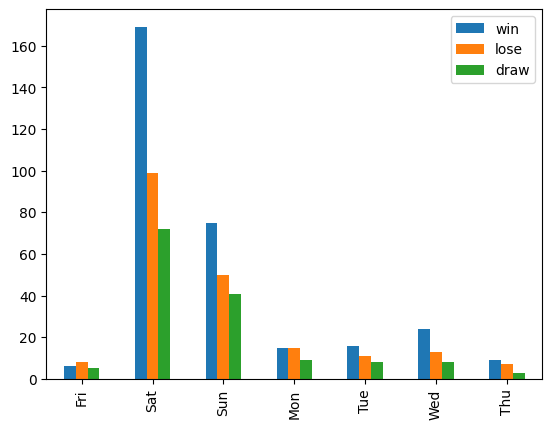

In [40]:
dfday_Epl = pd.DataFrame({'win': daywin_epltdata, 'lose': daylose_epltdata, 'draw': daydraw_epltdata}, index = EplData.Day.unique())
axday_Epl = dfday_Epl.plot.bar()

In [41]:
daywin_italydata=ItaData[ItaData["target"]=="Win"].Day.value_counts()
daylose_italydata=ItaData[ItaData["target"]=="Lose"].Day.value_counts()
daydraw_italydata=ItaData[ItaData["target"]=="Draw"].Day.value_counts()

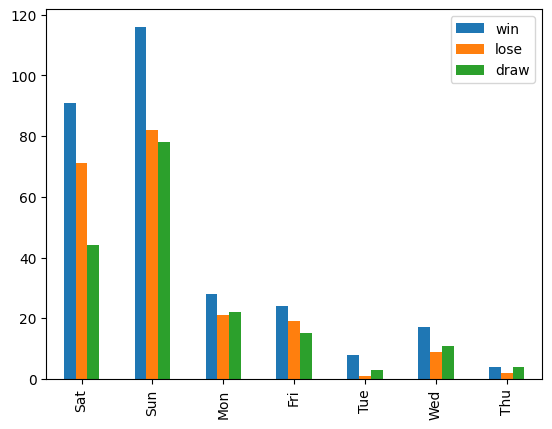

In [42]:
dfday_Italy = pd.DataFrame({'win': daywin_italydata, 'lose': daylose_italydata, 'draw': daydraw_italydata}, index = ItaData.Day.unique())
axday_Epl = dfday_Italy.plot.bar()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


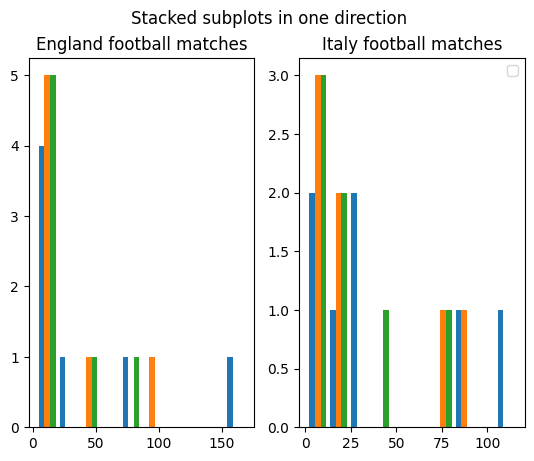

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dfday_Epl)
ax[1].hist(dfday_Italy)
 
# plot 2 subplots
ax[0].set_title('England football matches')
ax[1].set_title('Italy football matches')
 
fig.suptitle('Stacked subplots in one direction')
plt.legend()
plt.show()

__In conclusion__: Through the output from the calculations, I realize there is a difference high number of "Win" day between England and Italy football matches.

### Problem 2

I choose __EPL.xlsx__ that is the dataset to build a Machine learning model.

#### Data Preprocessing

1st, As I analyze the above information, there are text value in some columns. I have to convert it into numerical values for training/ testing model.

In [44]:
## Import library.

from sklearn import preprocessing

In [45]:
le = preprocessing.LabelEncoder()
le.fit(EplData.home_team)

LabelEncoder()

In [46]:
## Because home_team and away_team belong to the same value type, then I can convert it
## with the same preprocessing method.

EplData.home_team = le.transform(EplData.home_team)
EplData.away_team = le.transform(EplData.away_team)

In [47]:
## Apply the same method for Day/ Time/ Venue/ Referee/ Target

le.fit(EplData.Day)
EplData.Day = le.transform(EplData.Day)

le.fit(EplData.Time)
EplData.Time = le.transform(EplData.Time)

le.fit(EplData.Venue)
EplData.Venue = le.transform(EplData.Venue)

le.fit(EplData.Referee)
EplData.Referee = le.transform(EplData.Referee)

le.fit(EplData.target)
EplData.target = le.transform(EplData.target)

EplData.head()

,Matchweek,Day,Date,Season,Time,home_team,home_score,away_team,away_score,Venue,Referee,diff_score,target
0,1,0,2022-08-05,2022-2023,16,7,0,0,2,14,2,-2,1
1,1,2,2022-08-06,2022-2023,1,9,2,12,2,3,1,0,0
2,1,2,2022-08-06,2022-2023,6,20,4,19,1,20,0,3,2
3,1,2,2022-08-06,2022-2023,6,16,2,17,0,15,22,2,2
4,1,2,2022-08-06,2022-2023,6,10,2,22,1,4,18,1,2


#### Feature selection

For the dataset, through the above analysis, I realize "Date"/ "Season"/ "home_score"/ "away_score"/ "diff_score", they won't affect to the machine learning model. For feature selection, I will remove it for the data.

In [48]:
rm_col_list = ['Date','Season','diff_score', 'home_score', 'away_score']
col_list = EplData.columns.values.tolist()
col_list = [x for x in col_list if x not in rm_col_list]
col_list

['Matchweek',
 'Day',
 'Time',
 'home_team',
 'away_team',
 'Venue',
 'Referee',
 'target']

In [49]:
to_use = EplData[col_list] # the new data 
to_use.head()

,Matchweek,Day,Time,home_team,away_team,Venue,Referee,target
0,1,0,16,7,0,14,2,1
1,1,2,1,9,12,3,1,0
2,1,2,6,20,19,20,0,2
3,1,2,6,16,17,15,22,2
4,1,2,6,10,22,4,18,2


In [50]:
# Y_data is label, X_data is data for training/ testing

Y_data = to_use['target']
X_data = to_use.drop('target', axis=1)

In [51]:
# I use train_test_split to split X_data and Y_data into train/ test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

#### 1st Machine learning method
##### Linear Support Vector Machine Classification.

In [52]:
## Apply Linear Support Vector Machine Learning Classification

from sklearn.svm import LinearSVC

In [53]:
model_svc = LinearSVC(max_iter=10000)
model_svc.fit(X_train, Y_train)
predicted_svc = model_svc.predict(X_test)
predicted_svc

/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1])

In [54]:
# Inversing predicted value into Text label

target_prediction_svc = le.inverse_transform(predicted_svc)
target_prediction_svc

array(['Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Lose',
       'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Lose', 'Win', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Lose', 'Lose',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Lose',
       'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Lose',
       'Win', 'Win', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Lose', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Lose', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'W

In [55]:
# I write a function for multi-class by importing confusion matrix libraries.

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

In [56]:
def confussion_matrix(test_true, test_pred, test_class):
    cm = confusion_matrix(test_true, test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_class)
    fig, ax = plt.subplots(figsize=(15,15))
    disp.plot(ax=ax,cmap=plt.cm.Blues)
    plt.show()

    print(classification_report(test_true, test_pred, target_names=test_class))
    print("\n\nAccuracy: ", accuracy_score(test_true, test_pred))
    print("Recall: ", recall_score(test_true, test_pred, average='macro'))
    print("Precision: ", precision_score(test_true, test_pred, average='macro'))
    print("F1 Score: ", f1_score(test_true, test_pred, average='macro'))

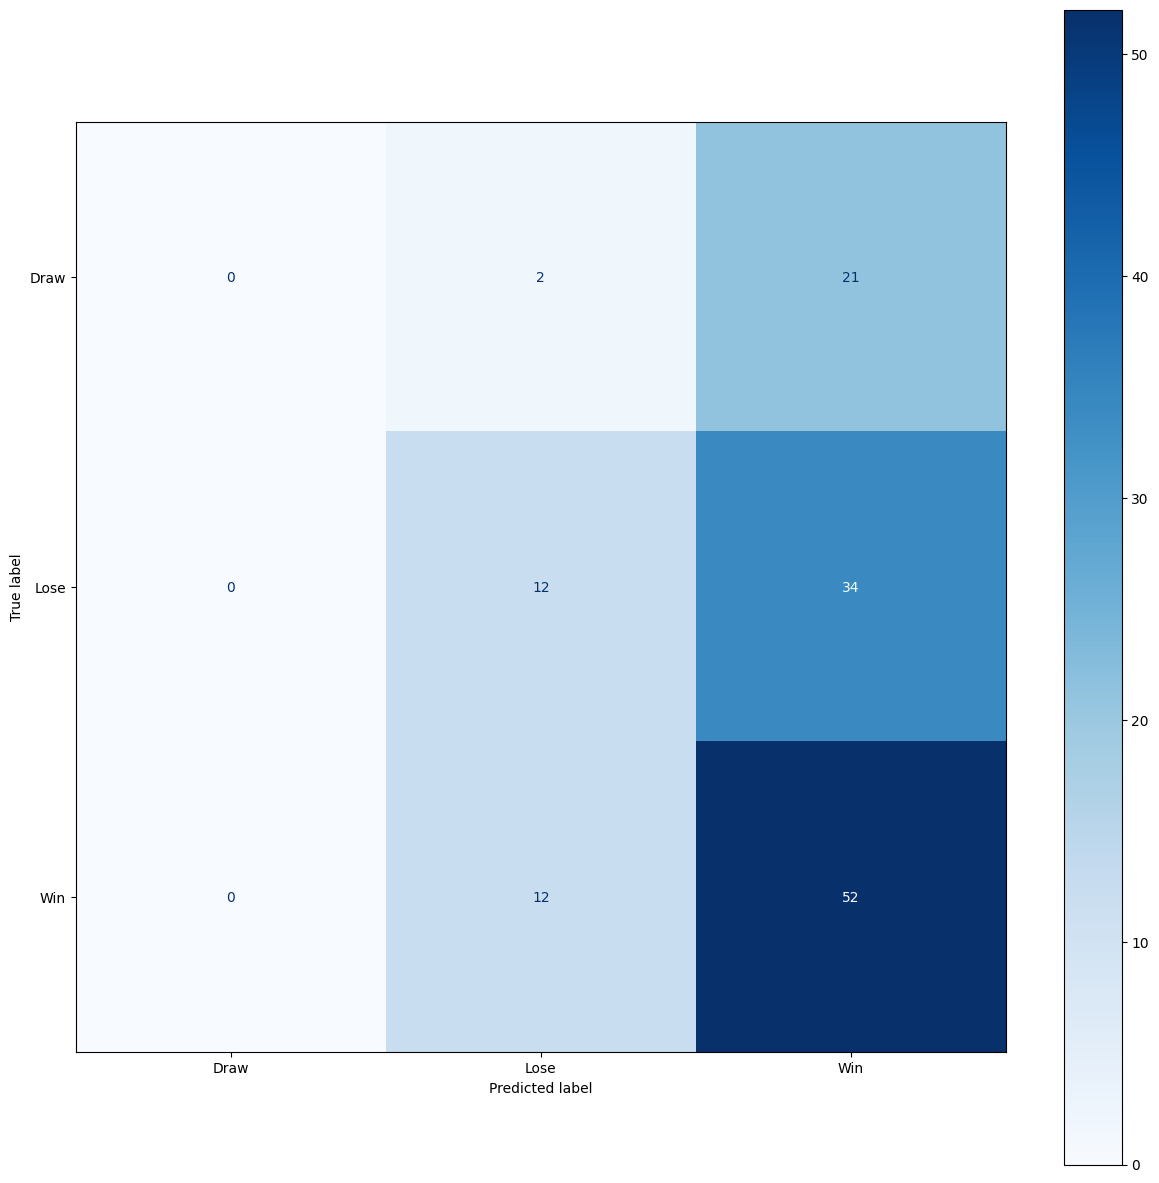

              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00        23
        Lose       0.46      0.26      0.33        46
         Win       0.49      0.81      0.61        64

    accuracy                           0.48       133
   macro avg       0.32      0.36      0.31       133
weighted avg       0.39      0.48      0.41       133



Accuracy:  0.48120300751879697
Recall:  0.3577898550724638
Precision:  0.3158399233165588
F1 Score:  0.3138401559454191


/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [57]:
testing_class = ['Draw', 'Lose', 'Win'] # Create classes
confussion_matrix(Y_test, predicted_svc, testing_class) # Do the above function

In [58]:
# Checking the accuracy of the trained model

from sklearn.metrics import accuracy_score

In [59]:
accuracy_svc = accuracy_score(Y_test, predicted_svc)
accuracy_svc

0.48120300751879697

##### Xgboost Classification.

In [60]:
# 2nd method: Xgboost method
# The below steps are the same as 1st strategy.
import xgboost as xgb

In [61]:
model_xgb = xgb.XGBClassifier(max_iter=10000)
model_xgb.fit(X_train, Y_train)

/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:13:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_iter=10000,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
predicted_xgb = model_xgb.predict(X_test)
predicted_xgb

array([2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2,
       2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0,
       1])

In [63]:
target_prediction_xgb = le.inverse_transform(predicted_xgb)
target_prediction_xgb

array(['Win', 'Draw', 'Win', 'Win', 'Win', 'Win', 'Draw', 'Lose', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Draw', 'Lose', 'Win', 'Win', 'Draw',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Draw', 'Win', 'Win', 'Win',
       'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win', 'Lose', 'Draw', 'Win',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Draw', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Draw', 'Lose', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Lose', 'Draw', 'Win', 'Draw', 'Lose', 'Lose', 'Lose',
       'Lose', 'Win', 'Lose', 'Lose', 'Win', 'Win', 'Win', 'Lose', 'Win',
       'Win', 'Win', 'Win', 'Draw', 'Lose', 'Lose', 'Lose', 'Draw',
       'Draw', 'Lose', 'Lose', 'Lose', 'Draw', 'Win', 'Draw', 'Draw',
       'Win', 'Lose', 'Lose', 'Lose', 'Lose', 'Lose', 'Win', 'Lose',
       'Win', 'Win', 'Draw', 'Win', 'Lose', 'Win', 'Win', 'Lose', 'Draw',
       'Win', 'Lose', 'Draw', 'Draw', 'Win', 'Win', 'Win', 'Lose', 'Wi

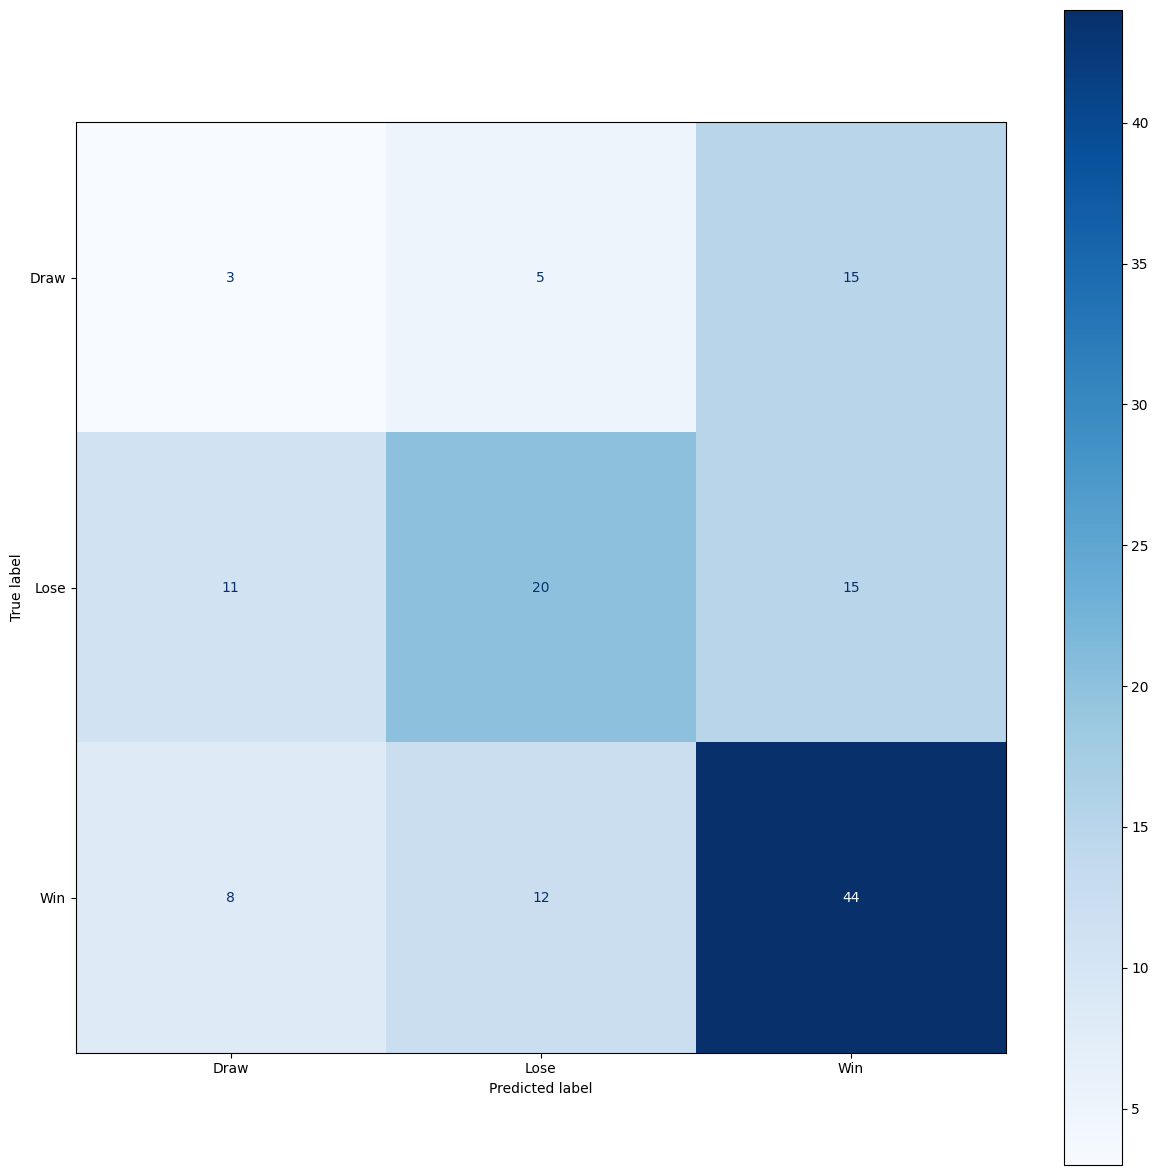

              precision    recall  f1-score   support

        Draw       0.14      0.13      0.13        23
        Lose       0.54      0.43      0.48        46
         Win       0.59      0.69      0.64        64

    accuracy                           0.50       133
   macro avg       0.42      0.42      0.42       133
weighted avg       0.50      0.50      0.50       133



Accuracy:  0.5037593984962406
Recall:  0.4175724637681159
Precision:  0.42383292383292387
F1 Score:  0.41764740119899885


In [64]:
confussion_matrix(Y_test, predicted_xgb, testing_class)

In [65]:
accuracy_xgb = accuracy_score(Y_test, predicted_xgb)
accuracy_xgb

0.5037593984962406

##### Random Forest Classification.

In [66]:
# 3rd: Random Forest Classifier method

from sklearn.ensemble import RandomForestClassifier

In [67]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [68]:
predicted_rfc = model_rfc.predict(X_test)
predicted_rfc

array([0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1])

In [69]:
target_prediction_rfc = le.inverse_transform(predicted_rfc)
target_prediction_rfc

array(['Draw', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Draw', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Lose', 'Win', 'Draw', 'Win',
       'Lose', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win', 'Lose', 'Win',
       'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Draw', 'Win', 'Win', 'Win',
       'Win', 'Draw', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Lose', 'Lose',
       'Win', 'Lose', 'Win', 'Draw', 'Win', 'Win', 'Win', 'Lose', 'Win',
       'Lose', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Win', 'Lose', 'Lose', 'Lose', 'Lose', 'Lose', 'Win',
       'Lose', 'Win', 'Lose', 'Draw', 'Win', 'Draw', 'Draw', 'Lose',
       'Lose', 'Win', 'Lose', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Lose', 'Win', 'Win', 'Lose', 'Lose', 'Win', 'Lose',
       'Draw', 'Draw', 'Win', 'Win', 'Lose', 'Lose', 'Win', 'L

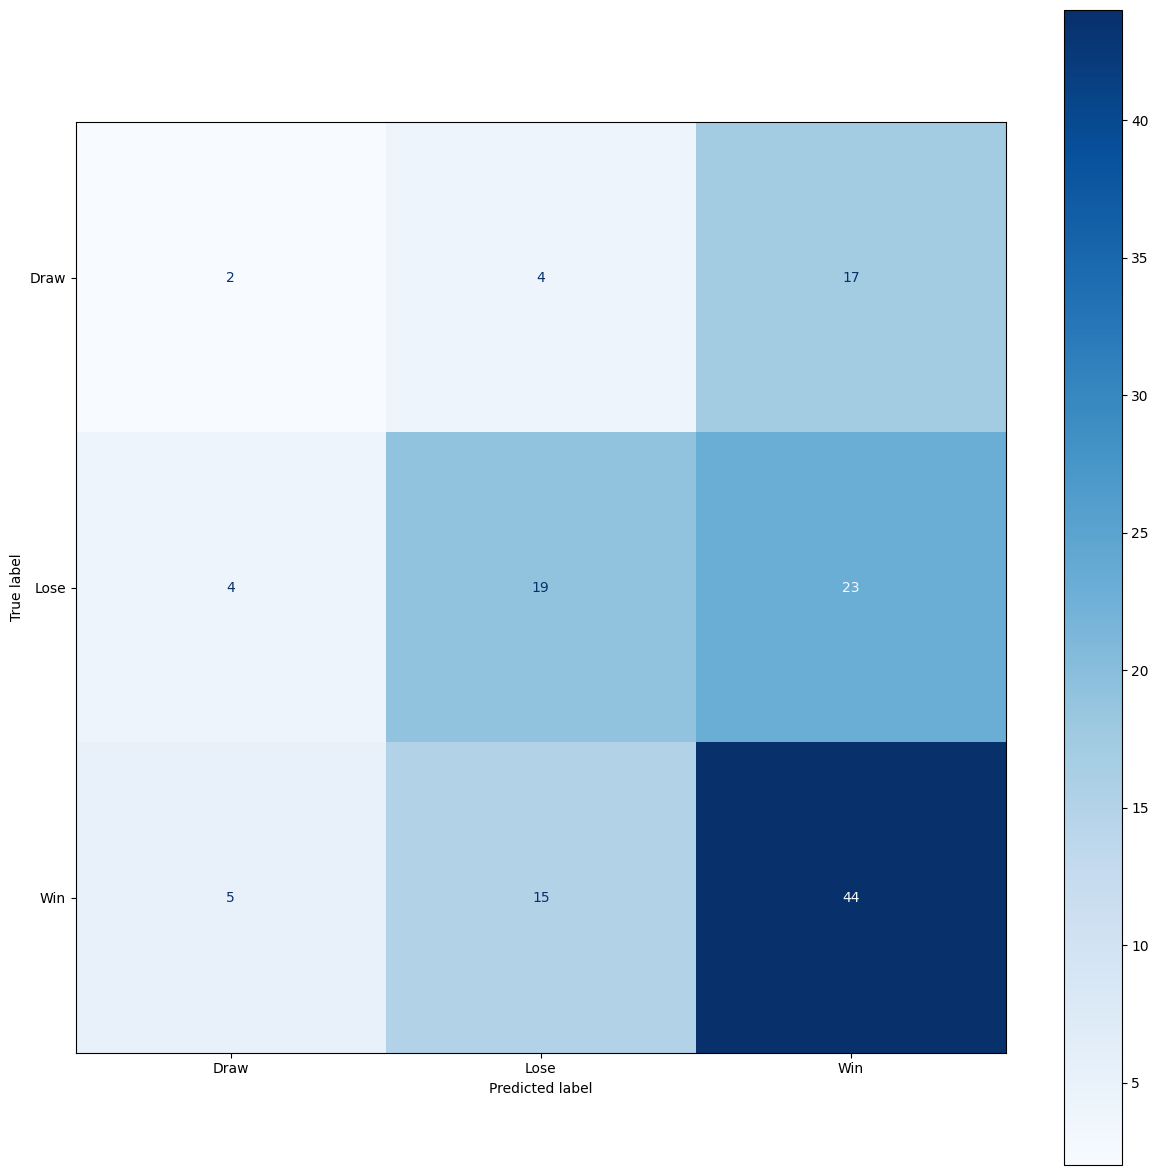

              precision    recall  f1-score   support

        Draw       0.18      0.09      0.12        23
        Lose       0.50      0.41      0.45        46
         Win       0.52      0.69      0.59        64

    accuracy                           0.49       133
   macro avg       0.40      0.40      0.39       133
weighted avg       0.46      0.49      0.46       133



Accuracy:  0.48872180451127817
Recall:  0.3958333333333333
Precision:  0.40187590187590194
F1 Score:  0.38820753526635876


In [70]:
confussion_matrix(Y_test, predicted_rfc, testing_class)

In [71]:
accuracy_rfc = accuracy_score(Y_test, predicted_rfc)
accuracy_rfc

0.48872180451127817

__In Conclusion__: I try 3 machine learning classification models:
+ Support Vector Machine.
+ __Xgboost__ (__The best model__)
+ Random Forest classification.

Through the accuracy and confusion matrix, I realize the Xgboost is the best model currently.

### Problem 3

Currently, the performance is still low. It's related to __the imbalance data__

__Win > Lose > Draw__ . To solve the issue, I apply upsampling method for "Lose"/ "Draw" to reduce the imbalance issue.

By using the upsampling method, I can generate various data including different columns.

In [72]:
# I only apply upsampling method for X_train and Y_train data.

X_data_new = pd.concat([X_train, Y_train], axis=1)
X_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 18 to 102
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Matchweek  530 non-null    int64
 1   Day        530 non-null    int64
 2   Time       530 non-null    int64
 3   home_team  530 non-null    int64
 4   away_team  530 non-null    int64
 5   Venue      530 non-null    int64
 6   Referee    530 non-null    int64
 7   target     530 non-null    int64
dtypes: int64(8)
memory usage: 37.3 KB


I split data into 3 data:
+ "Win" data.
+ "Lose" data.
+ "Draw" data.

In [73]:
X_train_data_2 = X_data_new[X_data_new["target"] == 2]
X_train_data_1  = X_data_new[X_data_new["target"] == 1]
X_train_data_0  = X_data_new[X_data_new["target"] == 0]

In [74]:
from sklearn.utils import resample

In [75]:
data_1_upsample = resample(X_train_data_1,
             replace=True,
             n_samples=len(X_train_data_2),
             random_state=42)

data_1_upsample.target.value_counts()
data_1_upsample.head()

,Matchweek,Day,Time,home_team,away_team,Venue,Referee,target
493,12,2,6,7,8,14,21,1
521,15,5,17,13,0,9,21,1
421,5,2,6,21,14,11,1,1
501,13,2,6,5,21,21,21,1
568,20,2,1,13,6,9,15,1


In [76]:
data_0_upsample = resample(X_train_data_0,
             replace=True,
             n_samples=len(X_train_data_2),
             random_state=42)
data_0_upsample.head()

,Matchweek,Day,Time,home_team,away_team,Venue,Referee,target
47,5,6,15,21,20,11,16,0
12,2,2,6,19,10,16,27,0
100,12,6,14,3,6,2,9,0
212,23,2,6,7,4,14,13,0
295,30,3,11,12,0,0,15,0


In [77]:
X_train_data_new = pd.concat([X_train_data_2, data_0_upsample, data_1_upsample], axis=0)

In [78]:
X_train_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 249 to 531
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Matchweek  750 non-null    int64
 1   Day        750 non-null    int64
 2   Time       750 non-null    int64
 3   home_team  750 non-null    int64
 4   away_team  750 non-null    int64
 5   Venue      750 non-null    int64
 6   Referee    750 non-null    int64
 7   target     750 non-null    int64
dtypes: int64(8)
memory usage: 52.7 KB


In [79]:
# Split X_train/ Y_train data again

col_list_train = ["Matchweek", "Day", "Time", "home_team","away_team", "Venue", "Referee"]
X_train2 = X_train_data_new[col_list_train] # the new data 
Y_train2 = X_train_data_new["target"]

In [80]:
model_xgb2 = xgb.XGBClassifier(max_iter=10000)
model_xgb2.fit(X_train2, Y_train2)

/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:13:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_iter=10000,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
predicted_xgb2 = model_xgb2.predict(X_test)
predicted_xgb2

array([2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2,
       0])

In [82]:
target_prediction_xgb2 = le.inverse_transform(predicted_xgb2)
target_prediction_xgb2

array(['Win', 'Draw', 'Win', 'Win', 'Win', 'Win', 'Draw', 'Draw', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Lose', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Draw', 'Win', 'Lose', 'Win',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Draw', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win',
       'Win', 'Win', 'Win', 'Draw', 'Lose', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Lose', 'Lose', 'Win', 'Draw', 'Lose', 'Win', 'Lose',
       'Lose', 'Win', 'Draw', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Draw', 'Win', 'Win', 'Win', 'Lose', 'Lose', 'Lose', 'Lose',
       'Draw', 'Win', 'Draw', 'Lose', 'Draw', 'Win', 'Draw', 'Draw',
       'Win', 'Win', 'Lose', 'Lose', 'Lose', 'Lose', 'Win', 'Lose',
       'Draw', 'Win', 'Draw', 'Win', 'Lose', 'Win', 'Win', 'Draw', 'Lose',
       'Win', 'Lose', 'Draw', 'Draw', 'Win', 'Lose', 'Win', 'Lose', 'Win'

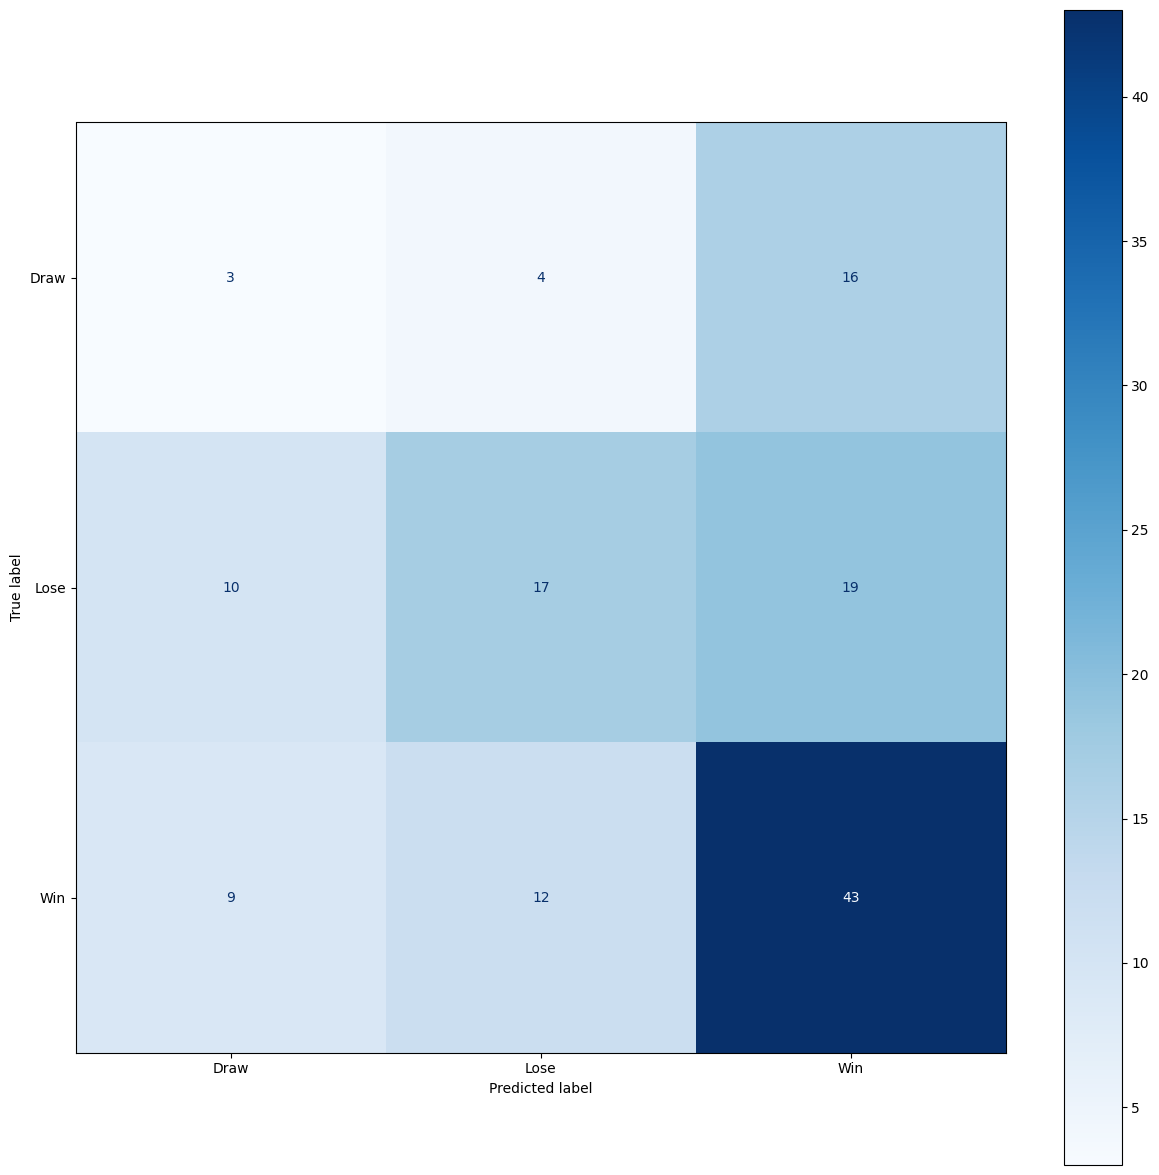

              precision    recall  f1-score   support

        Draw       0.14      0.13      0.13        23
        Lose       0.52      0.37      0.43        46
         Win       0.55      0.67      0.61        64

    accuracy                           0.47       133
   macro avg       0.40      0.39      0.39       133
weighted avg       0.47      0.47      0.46       133



Accuracy:  0.47368421052631576
Recall:  0.390625
Precision:  0.40093240093240096
F1 Score:  0.3897822943285593


In [83]:
confussion_matrix(Y_test, predicted_xgb2, testing_class)

In [84]:
accuracy_xgb2 = accuracy_score(Y_test, predicted_xgb2)
accuracy_xgb2

0.47368421052631576

In [85]:
model_svc2 = LinearSVC(max_iter=10000)
model_svc2.fit(X_train2, Y_train2)
predicted_svc2 = model_svc.predict(X_test)
predicted_svc2

/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1])

In [86]:
target_prediction_svc2 = le.inverse_transform(predicted_svc2)
target_prediction_svc2

array(['Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Lose',
       'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Lose', 'Win', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Lose', 'Lose',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Lose',
       'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Lose',
       'Win', 'Win', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Lose', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Lose', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'W

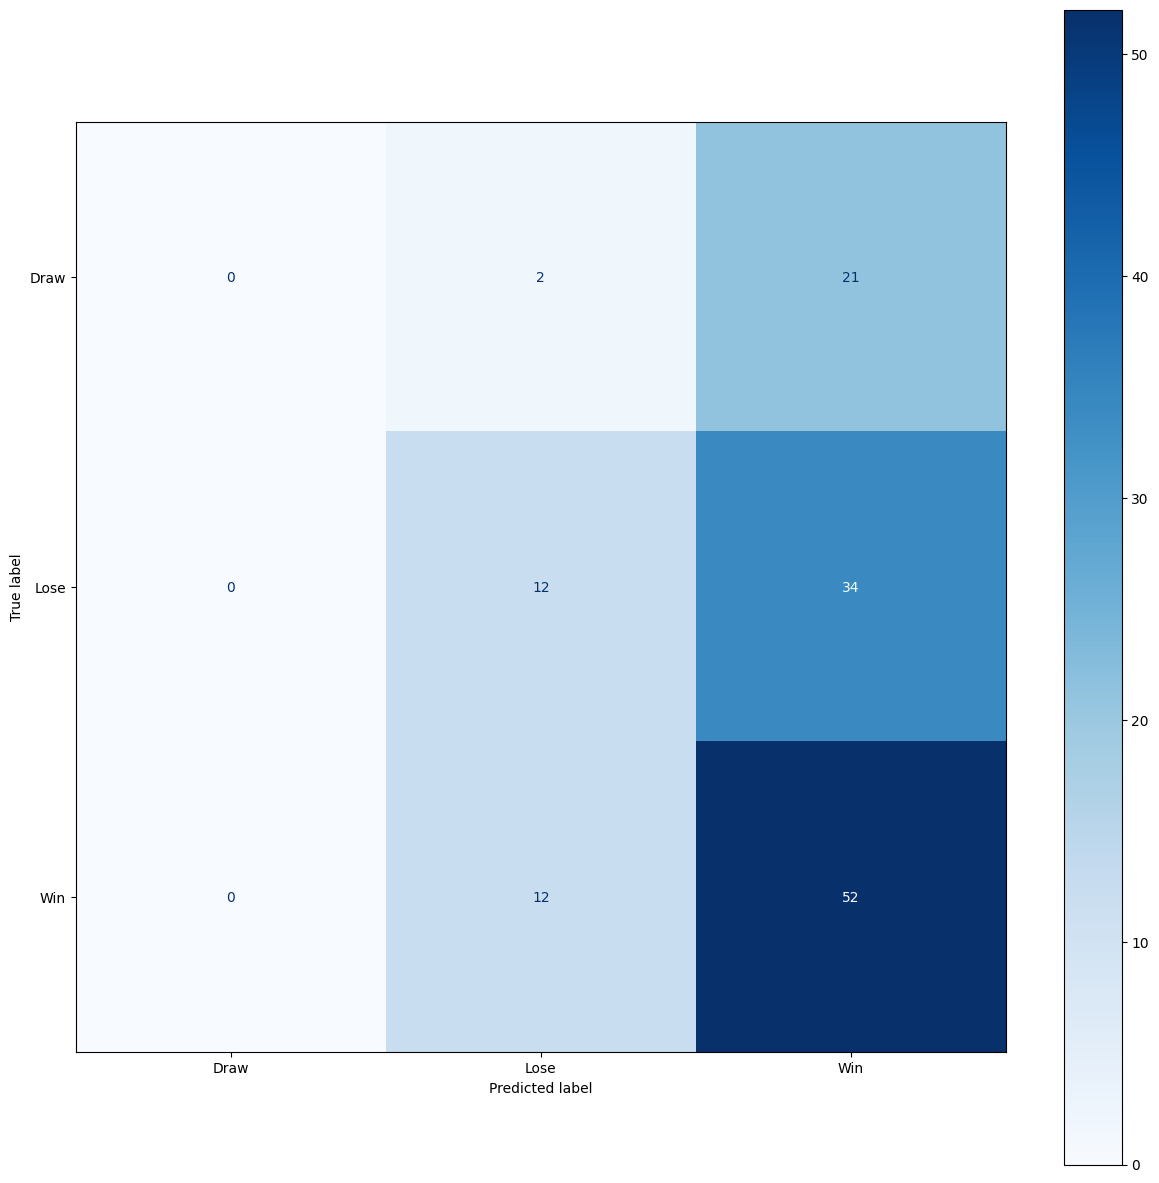

              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00        23
        Lose       0.46      0.26      0.33        46
         Win       0.49      0.81      0.61        64

    accuracy                           0.48       133
   macro avg       0.32      0.36      0.31       133
weighted avg       0.39      0.48      0.41       133



Accuracy:  0.48120300751879697
Recall:  0.3577898550724638
Precision:  0.3158399233165588
F1 Score:  0.3138401559454191


/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [87]:
confussion_matrix(Y_test, predicted_svc2, testing_class)

In [88]:
accuracy_svc2 = accuracy_score(Y_test, predicted_svc2)
accuracy_svc2

0.48120300751879697

In [89]:
params = {'booster': 'gblinear', 'objective': 'reg:linear', 'max_depth': 5, 'learning_rate': .001,
          'n_estimators': 1000,    'min_child_weight': 3, 'colsample_bytree': .7,
      'subsample': .8, 'gamma': 0.4, 'reg_alpha': 1}

model_xgb3 = xgb.XGBClassifier(max_iter=10000, params=params)
model_xgb3.fit(X_train2, Y_train2)
predicted_xgb3 = model_xgb3.predict(X_test)
predicted_xgb3

/Users/quangtn/opt/anaconda3/envs/fastapi_course/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:13:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_iter", "params" } are not used.

  warnings.warn(smsg, UserWarning)


array([2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2,
       0])

In [90]:
target_prediction_xgb3 = le.inverse_transform(predicted_xgb3)
target_prediction_xgb3

array(['Win', 'Draw', 'Win', 'Win', 'Win', 'Win', 'Draw', 'Draw', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Lose', 'Win', 'Win', 'Win',
       'Win', 'Win', 'Win', 'Win', 'Lose', 'Draw', 'Win', 'Lose', 'Win',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Draw', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win',
       'Win', 'Win', 'Win', 'Draw', 'Lose', 'Win', 'Win', 'Win', 'Win',
       'Win', 'Lose', 'Lose', 'Win', 'Draw', 'Lose', 'Win', 'Lose',
       'Lose', 'Win', 'Draw', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win',
       'Draw', 'Win', 'Win', 'Win', 'Lose', 'Lose', 'Lose', 'Lose',
       'Draw', 'Win', 'Draw', 'Lose', 'Draw', 'Win', 'Draw', 'Draw',
       'Win', 'Win', 'Lose', 'Lose', 'Lose', 'Lose', 'Win', 'Lose',
       'Draw', 'Win', 'Draw', 'Win', 'Lose', 'Win', 'Win', 'Draw', 'Lose',
       'Win', 'Lose', 'Draw', 'Draw', 'Win', 'Lose', 'Win', 'Lose', 'Win'

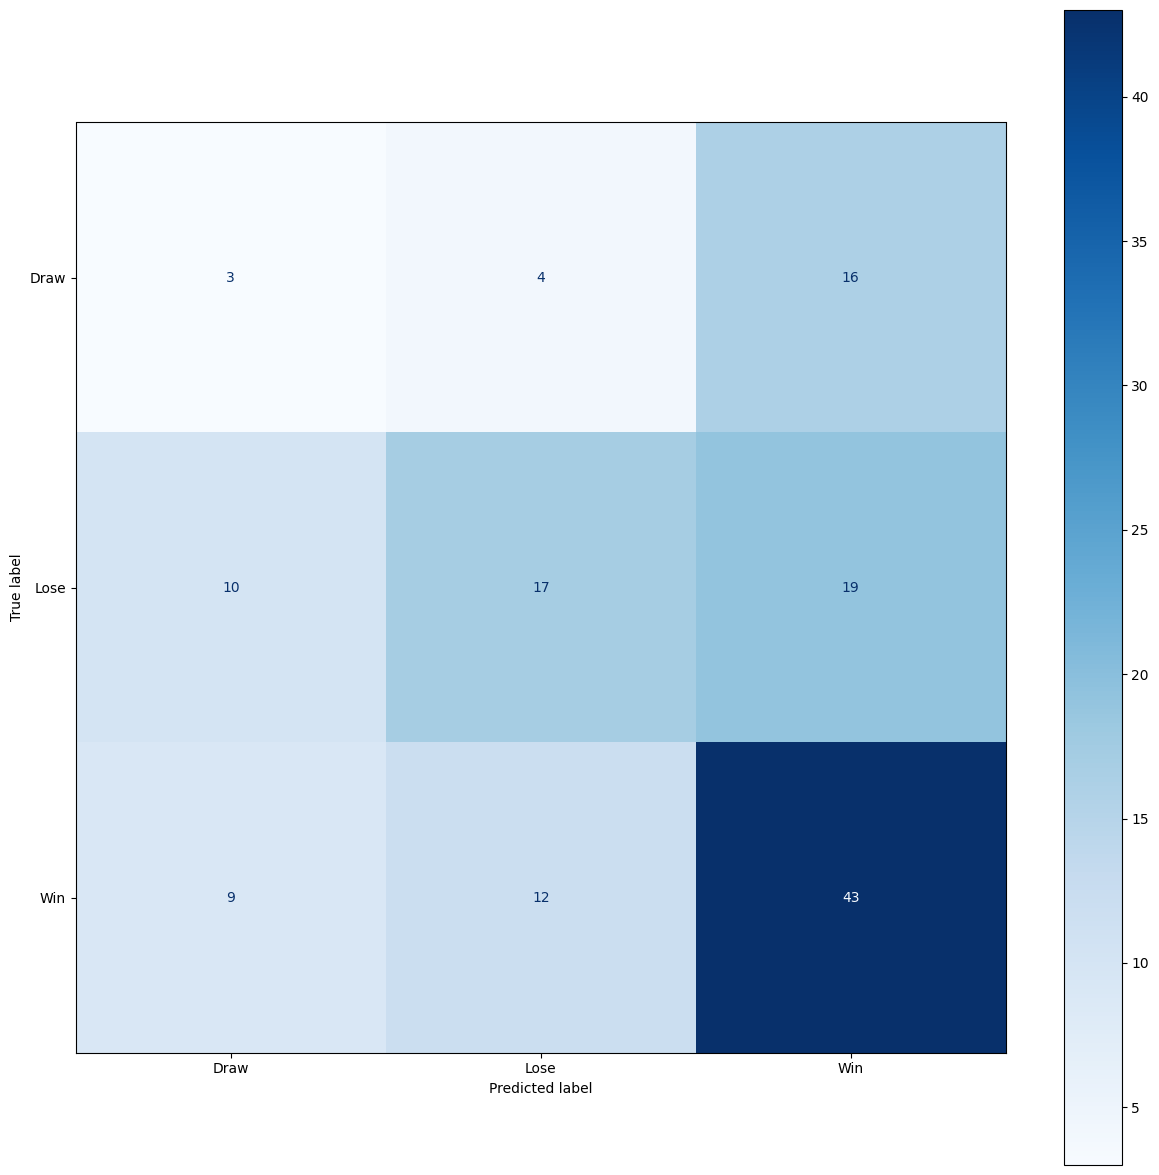

              precision    recall  f1-score   support

        Draw       0.14      0.13      0.13        23
        Lose       0.52      0.37      0.43        46
         Win       0.55      0.67      0.61        64

    accuracy                           0.47       133
   macro avg       0.40      0.39      0.39       133
weighted avg       0.47      0.47      0.46       133



Accuracy:  0.47368421052631576
Recall:  0.390625
Precision:  0.40093240093240096
F1 Score:  0.3897822943285593


In [91]:
confussion_matrix(Y_test, predicted_xgb3, testing_class)

In [92]:
accuracy_xgb3 = accuracy_score(Y_test, predicted_xgb3)
accuracy_xgb3

0.47368421052631576

In [93]:
## Generate a simple report for easy look.

result = {'SVC': accuracy_svc*100, 'Random Forest Clf': accuracy_rfc*100, 'Xgboost': accuracy_xgb*100, 'Xgboost_Upsample': accuracy_xgb2*100 , 'Xgboost_Conf': accuracy_xgb3*100}
df=pd.DataFrame(result.items(),columns=['Model','Accuracy'])

df

,Model,Accuracy
0,SVC,48.120301
1,Random Forest Clf,48.872180
2,Xgboost,50.375940
3,Xgboost_Upsample,47.368421
4,Xgboost_Conf,47.368421


### In conclusion

For methods, The curent best method is __Xgboost__
+ __Accuracy__:  50.376
+ __Recall__:  41.757
+ __Precision__:  42.383
+ __F1 Score__:  41.765

Besides the upsampling method, We can consider another method:

+ __Getting more data from different season__. As I anaylyzed the dataset, there are only 2 seasons for the dataset, so it lacks of data about the match result of each team for better prediction. For each __home_team__, it has a short of data (number of matches) about each opponent (__away_team__).
+ __Getting more information (columns) about each match__.